# Fictitious play and reinforcement learning for computing equilibria
- Repeated & zero sum (stochastic) games
- Fictitious play (FP) (theory and implementation)
- Reinforcement Learning (RL) (theory and implementation)
- Experimental results comparing FP and RL
- Reinforcement Learning (RL) (theory and implementation) Experimental results comparing FP and RL


---

## Repeated & zero sum (stochastic) games

### Zero-sum game
**Situation**
- competing entities
- the result is an **advantage for one side** and an **equivalent loss** for the other (+5, -5)
- the net improvement in benefit of the whole game is zero.
    - Why? The advantage for one side is an equal loss for the other side.
    - This sum is zero.

#### Examples of games
- poker
- chess
- sports?
- bridge

### Repeated/Iterated game
- The same stage is played at each timeframe.
- Repeated number of repetitions of a base game (stage game)
- Same game, multiple games

#### Examples
- 2 gas stations offer competing prices
- Stage Game: The single-shot game played in each period.

### Stochastic/Markov games
- dynamic, multi-agent
- probabilities influence the transition to next state
- player strategies depend only on the current state

## Environment/Game description

Construct a game/environment which combines the above 3 characteristics.
In other words, it asks for a Competitive Markov Game, a two-player zero-sum game.


---


## Equilibria

### Nash equilibrium
- no player could gain more by changing their play strategy in a game.
- players choose their optimal strategy against the other players constant strategy
- does not guarantee overall best pay-off
- suboptimal for the group
- **Pareto inefficient**


### Pareto optimality/efficiency
- is a group/collective strategy
- every player is better off
- no players in worse situations (aka no punished players)


---


## Fictitious play - FP
- players keep track of the empirical frequency of opponent's past moves
    - i.e. player 2 played heads 60% of the time
    - choose best response against that average
- players adjust their strategies
- players assume opponent's strategy based on past historical frequency
- FP is guaranteed to converge to Nash equilibrium.
    - WHY?
    - Player 2, always chooses best/rational response against player 1's move
- FP approach can be systematically exploited!!!

**Refs**:
What's FP:
- https://en.wikipedia.org/wiki/Fictitious_play

FP Agent design:
- https://www.youtube.com/watch?v=_XIdEr-wtJg

FP Agent beliefs initialization:
- https://cse.unl.edu/~lksoh/Classes/CSCE475_875_Fall17/handouts/sup09.pdf


---


## Reinforcement Learning - RL
- Player explores actions and receives rewards or punishments - feedback
- Implemented via Q-learning or variants.
- Q-value updated on trial and error - exploration


---

## Implementation

### Environment 1. Simple Rock Paper Scissors - RPS

- Same stage played at each iteration.

### Environment 2. Beefy Rock-Paper-Scissors - BRPS

This is a high stakes Rock-Paper-Scissors game.

#### States
1. `State-i`: Initial state: Standard rewards (+1 win, -1 loss)
2. `State-n`: Next state: Rewards of previous state are doubled each time
3. We cap the states to a number to reduce the amount of memory for the agents

#### Stochastic transition (P)
- If there's a draw at any state, there's a P-chance to transition into next state in which rewards double.
- Otherwise, game stays in the same state.

#### Zero-Sum rewards (R)
- The sum of the rewards for Player 1 and Player 2 is always 0.
- One player wins, other loses: rewards for one is equal penalty for other.

#### Repeated
- Player play 10 rounds of the same game.

---

# DONE

- [x] imlement beefy RPS env
- [x] implement FP agent
- [x] implement q-learning agent
- [x] Move into notebook

# TODO

- [ ] implement **decaying** epsilon

```python
np.linspace(1, 0, 1000)
```

- [ ] **implement minmax q-learning** - https://github.com/tocom242242/minimax_q_learning

- [ ] Convert into stochastic with limit cap
- [ ] break into modules
- [ ] extract metrics [scores, env.state, q-table, sigma, epsilon, diagrams, experiments, interpretations, self-plays]
- [ ] use petting zoo for RPS
- [ ] research - competitive grid world
- [ ] research - implement pong game (discrete actions)
- [ ] research - hunter-pray game gridworld
- [ ] research - implement multi-agent shooting game
- [ ] implement SARSA agent - https://www.geeksforgeeks.org/machine-learning/sarsa-reinforcement-learning/
- [ ] practical application ???
- [ ] evolutionary algorithms - research
- [ ] bomb difusal game/environment
- [ ] penalties game/environment


# Resources

READ THIS FIRST: https://lefkippos.ds.unipi.gr/modules/document/file.php/AI_IIT113/Lectures%205%20%26%206%20Agents-Interactions_Game_Theory.pdf

- Q-Learning (Pong) - https://courses.grainger.illinois.edu/ece448/sp2018/assignment4.html
- evolutionary algo - https://www.cs.vu.nl/~gusz/ecbook/Eiben-Smith-Intro2EC-Ch2.pdf
- evolutionary rl - https://github.com/RichardAragon/EvolutionaryReinforcementLearning
- paper to get games, metrics, algos - https://github.com/shiivashaakeri/Pong-Deep-QLearning/blob/main/Report.pdf
- q-learning tutorial - https://www.geeksforgeeks.org/machine-learning/q-learning-in-python/
- book implementations for RL - https://github.com/ShangtongZhang/reinforcement-learning-an-introduction
- RL taxonomy - https://github.com/bennylp/RL-Taxonomy
- OpenAI RL taxonomy - https://spinningup.openai.com/en/latest/spinningup/rl_intro2.html
- SARSA - https://github.com/linesd/tabular-methods/blob/master/algorithms/temporal_difference.py; https://www.geeksforgeeks.org/machine-learning/sarsa-reinforcement-learning/
- ALL RL ALGOS - https://github.com/FareedKhan-dev/all-rl-algorithms/blob/master/cheatsheet.md
- RL algorithms paper - https://arxiv.org/pdf/2209.14940
- minmax q-learning - https://github.com/tocom242242/minimax_q_learning/blob/master/minimax_q_learner.py; https://github.com/theevann/MinimaxQ-Learning
- Multi-Step Minimax Q-learning Algorithm for Two-Player Zero-Sum Markov Games - https://arxiv.org/abs/2407.04240
- Policies in MDPS and games - https://courses.cs.duke.edu/spring07/cps296.3/littman94markov.pdf
- **FLATLAND challenge** - https://gitlab.aicrowd.com/flatland/flatland; https://www.youtube.com/watch?v=cvkeWwDQr0A

---

# Environments

## 1. Rock-Paper-Scissors - RPS

To test the agents, we implement a simple Rock Paper Scissors - RPS environment. In each iteration, the agents play the same game - repeated.

### States
In its simple version, the same state is repeated in each iteration.

In its stochastic version, the state has a transition probability into the next state. In the next state, the rewards are doubled.

1. `State-i`: Initial state: Standard rewards (+1 win, -1 loss)
2. `State-n`: Next state: Rewards of previous state are doubled each time
3. We cap the states to a number to reduce the amount of memory for the agents

### Stochastic transition (P)
- If there's a draw at any state, there's a P-chance to transition into next state in which rewards double.
- Otherwise, game stays in the same state.

### Zero-Sum rewards (R)
- The sum of the rewards for Player 1 and Player 2 is always 0.
- One player wins, other loses: rewards for one is equal penalty for other.

In [107]:
import random

class RPS_environment():
    """
    Rock Paper Scissors environment - simple.
    """

    def __init__(self, payoff_matrix=None, stochastic=False, transition_prob=0.3, max_states=3):

        # Payoff Matrix: Player 1 rows, Player 2 cols
        # 0: Rock
        # 1: Paper
        # 2: Scissors
        # self.matrix = [
        #         # R  P  S
        #         [0, -1, 1],  # R
        #         [1, 0, -1],  # P
        #         [-1, 1, 0],  # S
        #         ]
        
        self.payoff_matrix = payoff_matrix
        self.stochastic = stochastic
        self.state = 0
        self.P = transition_prob
        self.max_states = max_states
        self.score1 = 0
        self.score2 = 0
        self.reward1 = 0
        self.reward2 = 0
        self.draws = 0

    def step(self, action1, action2):
        """
        Transition function:
        1. receive actions from players
        2. calculate rewards
        3. update state
        4. return information
        """

        reward1 = self.payoff_matrix[action1][action2]*(self.state+1)
        reward2 = -reward1

        self.update_score(reward1, reward2)
        self.update_reward(reward1, reward2)

        # Calculate transition
        if self.stochastic:
            if action1 == action2:
                if random.random() < self.P:
                    if self.state < self.max_states:
                        # We transition
                        self.state += 1
            else:
                self.reset()

        return self.state, reward1, reward2

    def update_score(self, reward1, reward2):
        """Keep scores of the agents."""
        if reward1>reward2:
            self.score1+=1
        elif reward2>reward1:
            self.score2+=1
        else:
            self.draws+=1

    def update_reward(self, reward1, reward2):
        """Reward counter for each agent."""
        self.reward1 += reward1
        self.reward2 += reward2

    def reset(self):
        """Winning condition reached."""
        self.state = 0

---

# Agents

## Fictitious play - FP agent

- This is a model based agent - tries to build a model of the environment to predict the best move.
- It has a memory of the previous plays of the opponent - tracks state changes.
- It tracks its opponents moves with a counter: `counts`
- It tracks a distribution for each of the opponent's moves: `sigma`
- In each round it plays the opposite move of the opponent: `best_move`
- This agent can get trapped into playing non-optimal moves.

In [104]:
class FictitiousPlayAgent():
    """
    Fictitious Play Agent: A model based agent.
    """

    def __init__(self, payoff_matrix):
        # Times a move has been played
                      #R #P #S
        self.counts = [1, 1, 1]

        # Probability distribution
                      #R #P #S
        self.sigma = [0, 0, 0]

        # Utility matrix
        self.rows = 3
        self.cols = 3
        self.payoff_matrix = payoff_matrix

    def action(self, opponent_action):
        """
        Calculate the best action and ACT.
        """
        if opponent_action is not None:
            self.update_counts(opponent_action)
            self.update_sigma(opponent_action)
            best_move = self.find_best_move()
        else:
            best_move = random.randint(0, 2)
        return best_move

    def update_counts(self, opponent_action):
        self.counts[opponent_action] += 1

    def update_sigma(self, opponent_action):
        for i in range(len(self.sigma)):
            self.sigma[i] = round(self.counts[i]/sum(self.counts), 3)

    def find_best_move(self):
        """
        Calculates utilities using distribution sigma and returns best move.
        """
        max_u = -float("inf")
        best_move = random.randint(0, 2)
        for i in range(self.rows):
            row_i_sum = sum([a*b for a, b in zip(self.payoff_matrix[i], self.sigma)])
            if row_i_sum > max_u:
                max_u = row_i_sum
                best_move = i

        return best_move

## Q-learning agent - simple

The simplest version of Q-learning algorithm.

This agent keep a table for each of its actions. It dcides on the next action using Bellman's equation:



In [239]:
import numpy as np

class QLearning():
    """Generic Q-Learning algorightm."""

    def __init__(self, states=[0], actions=[0, 1, 2], epsilon_init=0.1):
        # Initialize Q-table
        self.q_table = {state: [0.0 for action in actions] for state in states}
        self.epsilon = epsilon_init
        self.alpha = 0.1
        self.gamma = 0.9
        self.action_space = actions

        

    def action(self, state):
        """
        Choose an action using the epsilon-greedy policy.
        """
        if np.random.rand() < self.epsilon:
            # Explore
            chosen_action = np.random.choice(self.action_space)
        else:
            # Exploit
            state_values = self.q_table[state]
            max_val = max(state_values)
            # If we have multiple max values, runs a loop
            best_action = [i for i, v in enumerate(state_values) if v == max_val]
            chosen_action = np.random.choice(best_action)

        return chosen_action

    def epsilon_decay(self):
        """Epsilon decy funciton - updates value."""
        pass
        
    def update_q_value(self, state, action, reward, next_state):
        """
        Update the Q-value using Bellman eq..
        """
        max_next_q = max(self.q_table[next_state])
        # TEmpoeral difference
        td_target = reward + self.gamma * max_next_q

        # New Q value
        self.q_table[state][action] += self.alpha * (td_target - self.q_table[state][action])

### Epsilon decay functions

`epsilon` variable determines the eploration vs exploitation boundary. Here we implement several epsilon decay function to be used in RL algorithms which work using Bellman's equation.

#### Linear epsilon decay

In this scenario, `epsilon` decays by a stable step which is subtracted in each iteration. This allows for a smooth exploration.

Text(0.5, 1.0, 'Linear Epsilon Decay')

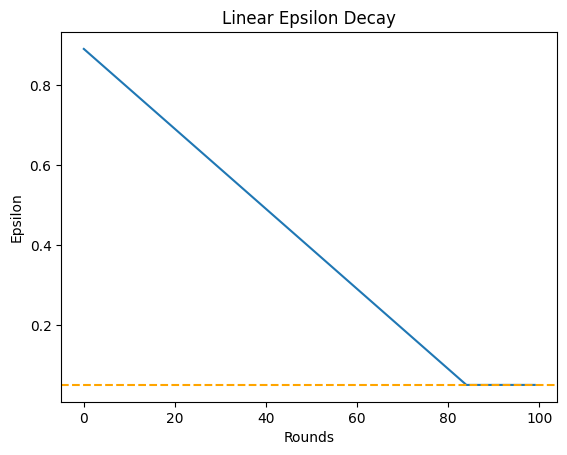

In [234]:
# Linear e
import numpy as np
import matplotlib.pyplot as plt


epsilon = 0.9
step = 0.01
data = []
rounds = 100
epsilon_threshold = 0.05 # Exploration limit

for i in range(rounds):
    if epsilon > epsilon_threshold:
        epsilon -= step
        data.append(round(epsilon, 3))a
    else:
        data.append(data[-1])

plt.plot(range(100), data)
plt.xlabel("Rounds")
plt.ylabel("Epsilon")
plt.axhline(y=epsilon_threshold, color="orange", linestyle="--")
plt.title("Linear Epsilon Decay")

#### Exponential epsilon decay

In this scenario, epsilon starts from a high value allowing the agent to explore, but then drops real quick transitioning in the exploitation phase.

Text(0.5, 1.0, 'Exponential Epsilon Decay')

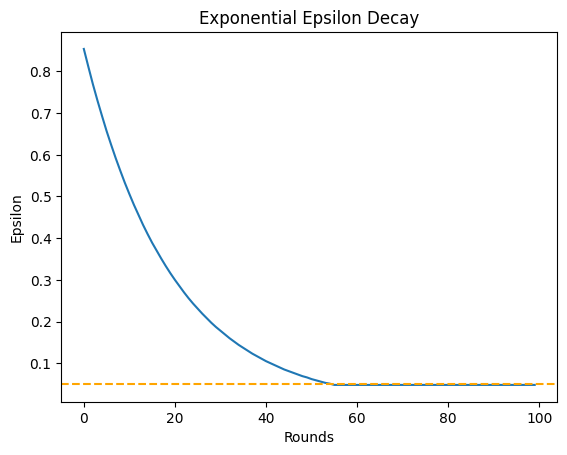

In [236]:
epsilon = 0.9
decay_factor = 0.949
data = []
rounds = 100
epsilon_threshold = 0.05

for i in range(rounds):
    if epsilon > epsilon_threshold:
        epsilon *= decay_factor
        data.append(round(epsilon, 3))
    else:
        data.append(data[-1])

plt.plot(range(rounds), data)
plt.xlabel("Rounds")
plt.ylabel("Epsilon")
plt.axhline(y=epsilon_threshold, color="orange", linestyle="--")
plt.title("Exponential Epsilon Decay")

# Scenarios

## FP self-play

In [113]:
def fp_self_play(rounds):
    env = RPS_environment(
        payoff_matrix=[
                 # R  P  S
                 [0, -1, 1],  # R
                 [1, 0, -1],  # P
                 [-1, 1, 0],  # S
        ]
    )

    # Row player
    agent1 = FictitiousPlayAgent(
            [
                 #R  P  S
                [0, -1, 1],  # R
                [1, 0, -1],  # P
                [-1, 1, 0],  # S
            ]
        )

    # Column player
    agent2 = FictitiousPlayAgent(
            [
                #R  P  S
                [0, 1, -1],  # R
                [-1, 0, 1],  # P
                [1, -1, 0],  # S
            ]
        )

    # Initializer
    last_act2 = None
    last_act1 = None

    env.reset()

    for i in range(rounds):
        curr_act1 = agent1.action(last_act2)
        curr_act2 = agent2.action(last_act1)

        env.step(curr_act1, curr_act2)

        last_act1 = curr_act1
        last_act2 = curr_act2

    print(f"Agent 1\ncounts: {agent1.counts}\nsigma: {agent1.sigma}\nScore: {env.score1}\nTotal reward: {env.reward1}")
    print("----------------")
    print(f"Agent 2\ncounts: {agent2.counts}\nsigma: {agent2.sigma}\nScore: {env.score2}\nTotal reward: {env.reward2}")
    print(f"Draws: {env.draws}")

In [112]:
fp_self_play(100)

Agent 1
counts: [72, 29, 1]
sigma: [0.706, 0.284, 0.01]
Score: 58
Total reward: 44
----------------
Agent 2
counts: [1, 86, 15]
sigma: [0.01, 0.843, 0.147]
Score: 14
Total reward: -44
Draws: 28


## FP vs Q-learning simple

In [129]:
def fp_vs_qlearning(rounds):
    
    env = RPS_environment(
        payoff_matrix=[
                 # R  P  S
                 [0, -1, 1],  # R
                 [1, 0, -1],  # P
                 [-1, 1, 0],  # S
        ]
    )

    # Row agent
    agent1 = FictitiousPlayAgent(
            [
                 #R  P  S
                [0, -1, 1],  # R
                [1, 0, -1],  # P
                [-1, 1, 0],  # S
            ]
        )

    agent2 = QLearning()

    # Initializer
    last_act2 = None

    env.reset()

    for i in range(rounds):
        curr_env_state = env.state

        # Register actions
        curr_act1 = agent1.action(last_act2)
        curr_act2 = agent2.action(curr_env_state) # pass curr env state

        # Step the environment
        next_env_state, reward1, reward2 = env.step(curr_act1, curr_act2)

        # RL agent learns
        agent2.update_q_value(curr_env_state, curr_act2, reward2, next_env_state)

        last_act2 = curr_act2

    print(f"FP\ncounts: {agent1.counts}\nsigma: {agent1.sigma}\nScore: {env.score1}\nTotal reward: {env.reward1}")
    print("------------")
    print(f"Q-learning\nq_table: {agent2.q_table}\nScore: {env.score2}\nTotal reward: {env.reward2}")
    print(f"Draws: {env.draws}")

In [134]:
fp_vs_qlearning(1000)

FP
counts: [332, 332, 338]
sigma: [0.331, 0.331, 0.337]
Score: 139
Total reward: -23
------------
Q-learning
q_table: {0: [0.41565003889968577, 1.2906433197566063, 0.8524037548223204]}
Score: 162
Total reward: 23
Draws: 699
